In [1]:
import pandas
from sklearn.neighbors import KernelDensity

In [2]:
titanic = pandas.read_csv('train.csv')
titanic_test1 = pandas.read_csv('test.csv')
titanic_test1.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [3]:
titanic_copy = titanic[titanic['Age'].isnull()].copy()
titanic_copy

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
29,30,0,3,"Todoroff, Mr. Lalio",male,NaN,0,0,349216,7.8958,NaN,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
32,33,1,3,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,7.7500,NaN,Q
36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C
42,43,0,3,"Kraeff, Mr. Theodor",male,NaN,0,0,349253,7.8958,NaN,C


In [4]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
#titanic_test.describe()

In [6]:
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].median())

In [7]:
titanic.loc[titanic['Sex'] == 'female', 'Sex'] = 1

In [8]:
titanic.loc[titanic['Sex'] == 'male', 'Sex'] = 0

In [9]:
titanic['Embarked'] = titanic['Embarked'].fillna('S')

In [10]:
titanic.loc[titanic['Embarked'] == 'S', 'Embarked'] = 0


In [11]:
titanic.loc[titanic['Embarked'] == 'C', 'Embarked'] = 1


In [12]:
titanic.loc[titanic['Embarked'] == 'Q', 'Embarked'] = 2

# On to machine learning
---

In [13]:
from sklearn.linear_model import LinearRegression,LogisticRegression

In [14]:
from sklearn.cross_validation import KFold

/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:42: DeprecationWarning: This module has been deprecated in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [15]:
predictors = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

In [16]:
alg = LinearRegression()

In [17]:
kf = KFold(titanic.shape[0], n_folds=3, random_state=1)

In [18]:
predictions = []

?? Why do we need this initialization? 
# Do predictions(Linear Regressions):
---
KFold function: is to split the original data set into n_folds train/test data sets. For example, here n_folds = 3 mean it will return 3 train(2/3)/test(1/3) data sets. And after the learning you can combine the test results together to get the final prediction results of the entire original data sets.

In [19]:
for train, test in kf:
    train_predictors = titanic[predictors].iloc[train,:]
    train_target = titanic['Survived'].iloc[train]
    alg.fit(train_predictors, train_target)
    test_predictions = alg.predict(titanic[predictors].iloc[test,:])
    predictions.append(test_predictions)

# Evaluating Errors
---
Error = $\frac{\#\ of\ correct\ predictions}{\#\ of\ people}$

In [20]:
import numpy as np

In [21]:
len(predictions)

3

In [22]:
predictions = np.concatenate(predictions, axis=0)

In [23]:
predictions[predictions > .5] = 1

In [24]:
predictions[predictions <= .5] = 0

In [25]:
accuracy = np.sum(predictions[predictions == titanic['Survived']]) / np.size(titanic['Survived'])

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:1: FutureWarning: in the future, boolean array-likes will be handled as a boolean array index
  if __name__ == '__main__':


In [26]:
accuracy

0.78338945005611671

# Do predictions(Logistic Regression):

In [27]:
predicitions_lg = []
alg = LogisticRegression(random_state=1)
import sklearn.cross_validation as cross_validation

In [28]:
scores = cross_validation.cross_val_score(alg, titanic[predictors], titanic['Survived'], cv = 3) 

In [29]:
np.mean(scores)

0.78787878787878773

# Generating submission file 
---
*  Preprocess test samples

In [30]:
titanic_test = pandas.read_csv("test.csv")
titanic_test['Age'] = titanic_test['Age'].fillna(titanic['Age'].median())
titanic_test.loc[titanic_test['Sex'] == 'male', 'Sex'] = 0
titanic_test.loc[titanic_test['Sex'] == 'female', 'Sex'] = 1
titanic_test['Embarked'] = titanic_test['Embarked'].fillna('S')
titanic_test.loc[titanic_test['Embarked'] == 'S', 'Embarked'] = 0
titanic_test.loc[titanic_test['Embarked'] == 'C', 'Embarked'] = 1
titanic_test.loc[titanic_test['Embarked'] == 'Q', 'Embarked'] = 2
titanic_test['Fare'] = titanic_test['Fare'].fillna(titanic['Fare'].median())

*  Train Logistic Model

In [31]:
alg = LogisticRegression()

In [32]:
alg.fit(titanic[predictors], titanic['Survived'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [33]:
predictions = alg.predict(titanic_test[predictors])

In [34]:
submission = pandas.DataFrame({
      'PassengerId':titanic_test['PassengerId'],
      'Survived': predictions    
    })

In [35]:
submission.to_csv('kaggle_submission_lg.csv', index=False)

# Do predictions(Random Forest):
---

In [36]:
from sklearn import cross_validation

In [37]:
from sklearn.ensemble import RandomForestClassifier

In [38]:
import numpy as np

In [39]:
predictors = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
meanscore_array = []

In [40]:
alg = RandomForestClassifier(random_state=1, n_estimators=150, min_samples_split=4,
       min_samples_leaf=2)

In [41]:
scores = cross_validation.cross_val_score(alg, titanic[predictors],
                                         titanic['Survived'], cv=3)

In [42]:
scores.mean()

0.8204264870931538

In [43]:
for i in range(30):
    alg = RandomForestClassifier(random_state=1, n_estimators=i+1, min_samples_split=2,
       min_samples_leaf=1)
    scores = cross_validation.cross_val_score(alg, titanic[predictors],
                                         titanic['Survived'], cv=3)
    meanscore_array.append(scores.mean())

In [44]:
np.argmax(meanscore_array)

13

## Generating new features
- FamilySize = SibSp + Parch
- NameLength = len(Name)
- Title 
- Family Id,

In [45]:
titanic['FamilySize'] = titanic['SibSp'] + titanic['Parch']

In [46]:
titanic['NameLength'] = titanic['Name'].apply(lambda x: len(x))

In [47]:
import re

def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    if title_search:
        return title_search.group(1)
    else:
        return ''
# Another function used to check another way to write the regular expressions
def get_title1(name):
    title_search = re.search(' ([A-Za-z]*)\.', name)
    if title_search:
        return title_search.group(1)
    else:
        return ''

In [48]:
titles = titanic['Name'].apply(get_title)
titles1 = titanic['Name'].apply(get_title)

In [49]:
for string, string1 in zip(titles, titles1):
    if(string != string1):
        print string, string1

In [50]:
pandas.value_counts(titles)

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Major         2
Mlle          2
Countess      1
Ms            1
Lady          1
Jonkheer      1
Don           1
Mme           1
Capt          1
Sir           1
Name: Name, dtype: int64

In [51]:
title_mapping = {'Mr': 1, 'Miss': 2, 'Mrs': 3, 'Master': 4
                , 'Dr': 5, 'Rev': 6, 'Col': 7, 'Major': 8, 'Mlle': 9, 'Countess': 10
                , 'Ms': 11, 'Lady': 12, 'Jonkheer': 13, 'Don': 14, 'Mme': 15, 'Capt': 16, 
                'Sir': 17}

In [52]:
for k, v in title_mapping.items():
    titles[titles == k] = v

In [53]:
titanic['Titles'] = titles

In [54]:
titanic['Titles']

0      1
1      3
2      2
3      3
4      1
5      1
6      1
7      4
8      3
9      3
10     2
11     2
12     1
13     1
14     2
15     3
16     4
17     1
18     3
19     3
20     1
21     1
22     2
23     1
24     2
25     3
26     1
27     1
28     2
29     1
      ..
861    1
862    3
863    2
864    1
865    3
866    2
867    1
868    1
869    4
870    1
871    3
872    1
873    1
874    3
875    2
876    1
877    1
878    1
879    3
880    3
881    1
882    2
883    1
884    1
885    3
886    6
887    2
888    2
889    1
890    1
Name: Titles, dtype: object

* Family Groups

In [55]:
import operator
titanic['Name'].head(10)

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                       Palsson, Master. Gosta Leonard
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

In [56]:
family_id_mapping = {}
operator.itemgetter(1)

In [57]:
def get_family_id(row):
    last_name = row['Name'].split(',')[0]
    family_id = '{0}{1}'.format(last_name, row['FamilySize'])
    if family_id not in family_id_mapping:
        if len(family_id_mapping) == 0:
            current_id = 1
        else:
            # here the operator.itemgetter is used to tell the comparison algo to compare the value/second item in each dict
            # ionary entry, 
            current_id = (max(family_id_mapping.items(), key=operator.itemgetter(1))[1]+1)
        family_id_mapping[family_id] = current_id
    return family_id_mapping[family_id]

In [58]:
family_ids = titanic.apply(get_family_id, axis=1)

In [59]:
family_ids[titanic['FamilySize'] < 3] = -1

In [60]:
pandas.value_counts(family_ids)

-1      800
 14       8
 149      7
 63       6
 50       6
 59       6
 17       5
 384      4
 27       4
 25       4
 162      4
 8        4
 84       4
 340      4
 43       3
 269      3
 58       3
 633      2
 167      2
 280      2
 510      2
 90       2
 83       1
 625      1
 376      1
 449      1
 498      1
 588      1
dtype: int64

In [61]:
titanic['FamilyId'] = family_ids

## Find out the best features

In [62]:
import numpy as np

In [63]:
from sklearn.feature_selection import SelectKBest, f_classif

In [64]:
predictors = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
             'Fare', 'Embarked', 'FamilySize', 'Titles', 'FamilyId']

In [65]:
selector = SelectKBest(f_classif, k=5)

In [66]:
selector.fit(titanic[predictors], titanic['Survived'])

SelectKBest(k=5, score_func=<function f_classif at 0x7f4f44aa2b18>)

In [67]:
scores = -np.log10(selector.pvalues_)

In [68]:
scores

array([ 24.59567142,  68.85199425,   1.27768955,   0.5342545 ,
         1.82976043,  14.21323514,   2.85130099,   0.20768458,
        19.14032274,   1.87160041])

In [69]:
%matplotlib inline
import matplotlib.pyplot as plt

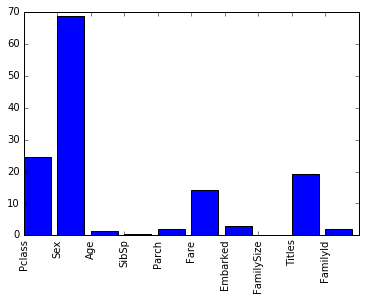

In [70]:
plt.bar(range(len(predictors)), scores)
plt.xticks(range(len(predictors)), predictors, rotation='vertical')
plt.show()

In [71]:
# Pick only the four best features ??????
predictors = ['Pclass', 'Sex', 'Fare', 'Titles']

In [72]:
alg = RandomForestClassifier(random_state=1, n_estimators=150,
                            min_samples_split=8, min_samples_leaf=4)

In [73]:
scores = cross_validation.cross_val_score(alg, titanic[predictors], titanic['Survived'], cv=3)

In [74]:
scores.mean()

0.81144781144781142

## Ensembling Method

In [75]:
from sklearn.ensemble import GradientBoostingClassifier

In [76]:
algorithms = [
    [GradientBoostingClassifier(random_state=1, n_estimators=25, max_depth=3), 
    ['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'FamilySize', 'Titles', 'FamilyId']],
    [LogisticRegression(random_state=1), ['Pclass', 'Sex',
    'Fare', 'FamilySize', 'Titles', 'Age', 'Embarked']     
    ]
]

In [77]:
kf = KFold(titanic.shape[0], n_folds=3, random_state=1)

In [78]:
predictions=[]

In [79]:
for train, test in kf:
    train_target = titanic['Survived'].iloc[train]
    full_test_predictions = []
    for alg, predictors in algorithms:
        alg.fit(titanic[predictors].iloc[train, :], train_target)
        test_predictions = alg.predict_proba(titanic[predictors].iloc[test, :])[:, 1]
        full_test_predictions.append(test_predictions)
    test_predictions = (full_test_predictions[0] + full_test_predictions[1]) / 2
    test_predictions[test_predictions > .5] = 1
    test_predictions[test_predictions <= .5] = 0
    predictions.append(test_predictions)

In [80]:
predictions = np.concatenate(predictions, axis=0)

In [81]:
predictions

array([ 0.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  0.,
        0.,  1.,  1.,  0.,  0.,  1.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,
        0.,  0.,  1.,  0.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,
        1.,  0.,  1.,  0.,  1.,  1.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,
        1.,  1.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,
        0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        1.,  1.,  0.,  0.,  1.,  0.,  1.,  1.,  0.,  0.,  1.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,
        0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  1.,  0.,  0.,
        0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,
        0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  1.,  1.,  1.,  1.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
        1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
        0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0

In [82]:
accuracy = sum(predictions[predictions == titanic['Survived']]) / len(predictions)

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:1: FutureWarning: in the future, boolean array-likes will be handled as a boolean array index
  if __name__ == '__main__':


In [83]:
accuracy

0.82379349046015715

(array([  17.,  256.,   76.,   26.,   20.,   69.,   17.,   14.,    2.,
           8.,   13.,   11.,    3.,    5.,    7.,    8.,    2.,    4.,
           0.,    0.,    1.,    3.,    1.,    2.,    0.,    0.,    2.,
           0.,    0.,    2.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    1.,    0.,    1.,    1.,
           0.,    0.,    0.,    1.,    0.,    0.,    2.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    2.]),
 array([   0.      ,    5.123292,   10.246584,   15.369876,   20.493168,
          25.61646 ,   30.739752,   35.863044,   40.986336,   46.109628,
          51.23292 ,   56.356212,   61.479504,   66.602796,   71

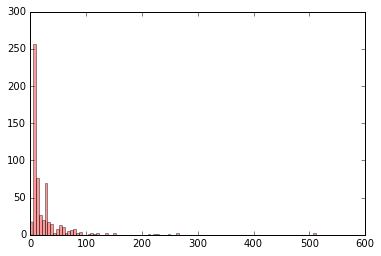

In [84]:
fare_female = titanic.loc[titanic['Sex'] == 0, 'Fare']
plt.hist(fare_female, bins=100, fc = 'red', alpha = 0.4)

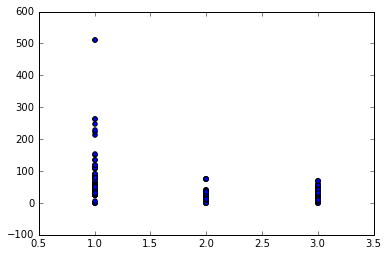

In [85]:
pclass_female = titanic.loc[titanic['Sex'] == 0, 'Pclass']
#plt.hist(pclass_female, bins=100, fc = 'red', alpha = 0.4)
plt.scatter(pclass_female, fare_female)

In [86]:
age_female = [titanic.loc[np.logical_and(np.logical_and(titanic['Sex']==0, titanic['Pclass'] == i), titanic['Age'] <= 70), ['Age']] for i in np.arange(3)+1 ]
age_male = [titanic.loc[np.logical_and(np.logical_and(titanic['Sex']==1, titanic['Pclass']==i), titanic['Age']<=70), ['Age']] for i in np.arange(3)+1 ]
age_female_test = [titanic_test.loc[np.logical_and(np.logical_and(titanic_test['Sex']==0, titanic_test['Pclass'] == i), titanic_test['Age'] <= 70), ['Age']] for i in np.arange(3)+1 ]
age_male_test = [titanic_test.loc[np.logical_and(np.logical_and(titanic_test['Sex']==1, titanic_test['Pclass']==i), titanic_test['Age']<=70), ['Age']] for i in np.arange(3)+1 ]

female Pclass 1, best guess for age:27, the median age is: 41.0 
female Pclass 2, best guess for age:27, the median age is: 28.0 
female Pclass 3, best guess for age:27, the median age is: 28.0 


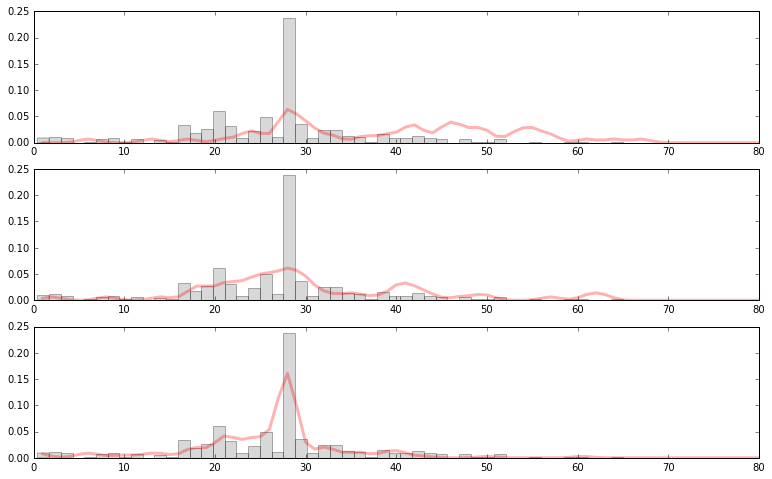

In [87]:
x_grid = np.linspace(1, 80, 80)
fig, axes = plt.subplots(3, 1, figsize=(13, 8))
for i, ax in enumerate(axes):
    kde_skl = KernelDensity(bandwidth=1,)
    kde_skl.fit(np.array(age_female_test[i]))
    log_pdf = kde_skl.score_samples(x_grid[:, np.newaxis])
    pdf = np.exp(log_pdf)
    ax.plot(x_grid,pdf, color='red', alpha=.3, lw=3)
    ax.hist(age_female[2]['Age'], fc='grey', alpha=.3, bins=50, normed=True)
    age = np.argmax(pdf)
    print('female Pclass {0}, best guess for age:{1}, the median age is: {2} '.format(i+1, age, age_female_test[i]['Age'].median()))

male Pclass 1, best guess for age:27, the median age:39.0
male Pclass 2, best guess for age:29, the median age:24.0
male Pclass 3, best guess for age:27, the median age:28.0


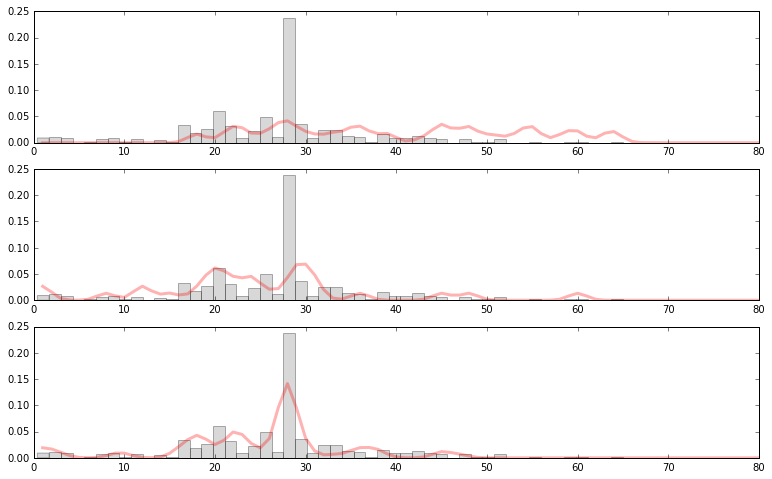

In [88]:
x_grid = np.linspace(1, 80, 80)
fig, axes = plt.subplots(3, 1, figsize=(13, 8))
for i, ax in enumerate(axes):
    kde_skl = KernelDensity(bandwidth=1,)
    kde_skl.fit(np.array(age_male_test[i]))
    log_pdf = kde_skl.score_samples(x_grid[:, np.newaxis])
    pdf = np.exp(log_pdf)
    ax.plot(x_grid,pdf, color='red', alpha=.3, lw=3)
    ax.hist(age_female[2]['Age'], fc='grey', alpha=.3, bins=50, normed=True)
    age = np.argmax(pdf)
    print('male Pclass {0}, best guess for age:{1}, the median age:{2}'.format(i+1, age, age_male_test[i]['Age'].median()))

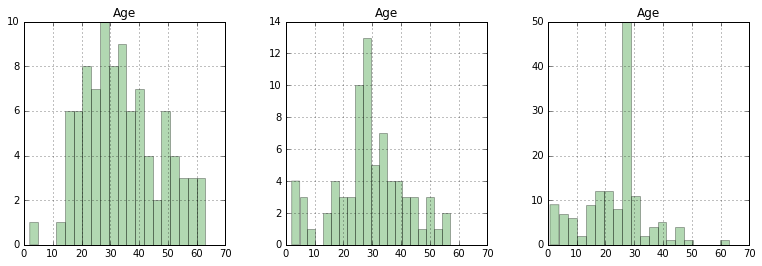

In [89]:
fig, axes = plt.subplots(1, 3, figsize=(13,4))
for i, ax in enumerate(axes):
    ked_skl = KernelDensity(bandwidth = 2,)
    ked_skl.fit(age_male[i])
    age_male[i].hist(ax=ax, bins = 20, alpha = 0.3, fc = 'green')
    ax.set_xlim([0,70])

In [129]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
data = enc.fit_transform(titanic.loc[:, 'Embarked'])
print(data)

  (0, 890)	1.0
  (0, 889)	1.0
  (0, 888)	1.0
  (0, 887)	1.0
  (0, 886)	1.0
  (0, 885)	1.0
  (0, 884)	1.0
  (0, 883)	1.0
  (0, 882)	1.0
  (0, 881)	1.0
  (0, 880)	1.0
  (0, 879)	1.0
  (0, 878)	1.0
  (0, 877)	1.0
  (0, 876)	1.0
  (0, 875)	1.0
  (0, 874)	1.0
  (0, 873)	1.0
  (0, 872)	1.0
  (0, 871)	1.0
  (0, 870)	1.0
  (0, 869)	1.0
  (0, 868)	1.0
  (0, 867)	1.0
  (0, 866)	1.0
  :	:
  (0, 24)	1.0
  (0, 23)	1.0
  (0, 22)	1.0
  (0, 21)	1.0
  (0, 20)	1.0
  (0, 19)	1.0
  (0, 18)	1.0
  (0, 17)	1.0
  (0, 16)	1.0
  (0, 15)	1.0
  (0, 14)	1.0
  (0, 13)	1.0
  (0, 12)	1.0
  (0, 11)	1.0
  (0, 10)	1.0
  (0, 9)	1.0
  (0, 8)	1.0
  (0, 7)	1.0
  (0, 6)	1.0
  (0, 5)	1.0
  (0, 4)	1.0
  (0, 3)	1.0
  (0, 2)	1.0
  (0, 1)	1.0
  (0, 0)	1.0


/usr/local/lib/python2.7/dist-packages/sklearn/utils/validation.py:397: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


# Make predictions on test dataset

In [90]:
# First, we'll add titles to the test set.
titles = titanic_test["Name"].apply(get_title)
print(titles)
# We're adding the Dona title to the mapping, because it's in the test set, but not the training set
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Dr": 5, "Rev": 6, "Major": 7, "Col": 7, "Mlle": 8, "Mme": 8, "Don": 9, "Lady": 10, "Countess": 10, "Jonkheer": 10, "Sir": 9, "Capt": 7, "Ms": 2, "Dona": 10}
for k,v in title_mapping.items():
    titles[titles == k] = v
titanic_test["Titles"] = titles
# Check the counts of each unique title.
print(pandas.value_counts(titanic_test["Titles"]))

# Now, we add the family size column.
titanic_test["FamilySize"] = titanic_test["SibSp"] + titanic_test["Parch"]

# Now we can add family ids.
# We'll use the same ids that we did earlier.
print(family_id_mapping)

family_ids = titanic_test.apply(get_family_id, axis=1)
family_ids[titanic_test["FamilySize"] < 3] = -1
titanic_test["FamilyId"] = family_ids
titanic_test['NameLength'] = titanic_test['Name'].apply(lambda x: len(x))

0          Mr
1         Mrs
2          Mr
3          Mr
4         Mrs
5          Mr
6        Miss
7          Mr
8         Mrs
9          Mr
10         Mr
11         Mr
12        Mrs
13         Mr
14        Mrs
15        Mrs
16         Mr
17         Mr
18       Miss
19        Mrs
20         Mr
21     Master
22        Mrs
23         Mr
24        Mrs
25         Mr
26       Miss
27         Mr
28         Mr
29         Mr
        ...  
388        Mr
389    Master
390        Mr
391       Mrs
392    Master
393        Mr
394        Mr
395       Mrs
396        Mr
397       Mrs
398        Mr
399        Mr
400      Miss
401        Mr
402      Miss
403        Mr
404        Mr
405        Mr
406        Mr
407        Mr
408      Miss
409      Miss
410      Miss
411       Mrs
412      Miss
413        Mr
414      Dona
415        Mr
416        Mr
417    Master
Name: Name, dtype: object
1     240
2      79
3      72
4      21
7       2
6       2
10      1
5       1
Name: Titles, dtype: int64
{"O'Sullivan0

In [91]:
predictors = ["Pclass", "Sex", "Age", "Fare", "Embarked", "FamilySize", "Titles", "FamilyId"]

algorithms = [
    [GradientBoostingClassifier(random_state=1, n_estimators=25, max_depth=3), predictors],
    [LogisticRegression(random_state=1), ["Pclass", "Sex", "Fare", "FamilySize", "Titles", "Age", "Embarked"]]
]

full_predictions = []
for alg, predictors in algorithms:
    # Fit the algorithm using the full training data.
    alg.fit(titanic[predictors], titanic["Survived"])
    # Predict using the test dataset.  We have to convert all the columns to floats to avoid an error.
    predictions = alg.predict_proba(titanic_test[predictors].astype(float))[:,1]
    full_predictions.append(predictions)


# The gradient boosting classifier generates better predictions, so we weight it higher.
predictions = (full_predictions[0] * 3 + full_predictions[1]) / 4
predictions[predictions > 0.5] = 1
predictions[predictions <= 0.5] = 0
predictions = predictions.astype(int)
submission = pandas.DataFrame({
    'PassengerId': titanic_test['PassengerId'],
    'Survived': predictions
    })
submission.to_csv('kaggle_gbt.csv', index=False)

In [92]:
titanic[titanic['Sex'] == 1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,NameLength,Titles,FamilyId
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,PC 17599,71.2833,C85,1,1,51,3,-1
2,3,1,3,"Heikkinen, Miss. Laina",1,26,0,0,STON/O2. 3101282,7.9250,NaN,0,0,22,2,-1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,113803,53.1000,C123,0,1,44,3,-1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27,0,2,347742,11.1333,NaN,0,2,49,3,-1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14,1,0,237736,30.0708,NaN,1,1,35,3,-1
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",1,4,1,1,PP 9549,16.7000,G6,0,2,31,2,-1
11,12,1,1,"Bonnell, Miss. Elizabeth",1,58,0,0,113783,26.5500,C103,0,0,24,2,-1
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",1,14,0,0,350406,7.8542,NaN,0,0,36,2,-1
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",1,55,0,0,248706,16.0000,NaN,0,0,32,3,-1
18,19,0,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",1,31,1,0,345763,18.0000,NaN,0,1,55,3,-1


In [93]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,NameLength,Titles,FamilyId
0,1,0,3,"Braund, Mr. Owen Harris",0,22,1,0,A/5 21171,7.2500,NaN,0,1,23,1,-1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,PC 17599,71.2833,C85,1,1,51,3,-1
2,3,1,3,"Heikkinen, Miss. Laina",1,26,0,0,STON/O2. 3101282,7.9250,NaN,0,0,22,2,-1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,113803,53.1000,C123,0,1,44,3,-1
4,5,0,3,"Allen, Mr. William Henry",0,35,0,0,373450,8.0500,NaN,0,0,24,1,-1
5,6,0,3,"Moran, Mr. James",0,28,0,0,330877,8.4583,NaN,2,0,16,1,-1
6,7,0,1,"McCarthy, Mr. Timothy J",0,54,0,0,17463,51.8625,E46,0,0,23,1,-1
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2,3,1,349909,21.0750,NaN,0,4,30,4,8
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27,0,2,347742,11.1333,NaN,0,2,49,3,-1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14,1,0,237736,30.0708,NaN,1,1,35,3,-1


# Use xgboost model to do predictions

In [94]:
import xgboost as xgb

## Turn the original data to DMatrix format

In [95]:
# Turn the pandas DataFrame to DMatrix format
ftrain = open('./titanic.train.dmatrix', 'w')
ftest = open('./titanic.test.dmatrix', 'w')
for i in range(titanic.shape[0]):
    ftrain.write(str(titanic['Survived'].iloc[i]))
    ftrain.write(' ')
    for j in range(len(predictors)):
        ftrain.write(str(j))
        ftrain.write(':')
        ftrain.write(str(titanic[predictors[j]].iloc[i]))
        ftrain.write(' ')
    ftrain.write('\n')
for i in range(titanic_test.shape[0]):
    ftest.write(str(-1))
    ftest.write(' ')
    for j in range(len(predictors)):
        ftest.write(str(j))
        ftest.write(':')
        ftest.write(str(titanic_test[predictors[j]].iloc[i]))
        ftest.write(' ')
    ftest.write('\n')

In [96]:
dtrain = xgb.DMatrix('./titanic.train.dmatrix')

In [97]:
params = {'max_depth':3, 'eta':0.5, 'silent':1, 'objective':'binary:logistic'}
num_round = 20

In [98]:
t = xgb.cv(params, dtrain, num_round, nfold=4, metrics={'error'}, seed=0)

In [99]:
t

,test-error-mean,test-error-std,train-error-mean,train-error-std
0,0.194186,0.014477,0.179070,0.004586
1,0.194186,0.015205,0.165116,0.001733
2,0.197674,0.021187,0.161628,0.004298
3,0.190697,0.018893,0.157364,0.003196
4,0.189535,0.015557,0.156589,0.003798
5,0.189535,0.022397,0.153488,0.002901
6,0.194186,0.023110,0.151163,0.004586
7,0.187210,0.019283,0.148450,0.002293
8,0.187210,0.020107,0.140310,0.004964
9,0.181395,0.015071,0.138760,0.006250


In [100]:
bst = xgb.train(params, dtrain, num_round)

In [101]:
dtest = xgb.DMatrix('./titanic.test.dmatrix')

In [102]:
preds = bst.predict(dtest)

In [103]:
labels = dtest.get_label()

In [104]:
preds

array([ 0.06911155,  0.2674017 ,  0.08033457,  0.30312023,  0.6137647 ,
        0.09824399,  0.50719249,  0.14335673,  0.90043563,  0.04593448,
        0.09114161,  0.09201547,  0.97086042,  0.06326418,  0.94005871,
        0.94326621,  0.22231489,  0.16028696,  0.74968803,  0.40457192,
        0.24805036,  0.50395483,  0.97065824,  0.37323105,  0.97791356,
        0.03462952,  0.96479279,  0.16028696,  0.63100916,  0.14548214,
        0.03719201,  0.10415883,  0.6936453 ,  0.57054126,  0.57324082,
        0.22387575,  0.45691153,  0.33919674,  0.13759397,  0.47358444,
        0.07921507,  0.64302379,  0.07196452,  0.89028698,  0.97586274,
        0.13759397,  0.21057546,  0.13155627,  0.96645641,  0.57713336,
        0.33110383,  0.09863367,  0.84926862,  0.90146142,  0.19305243,
        0.05363898,  0.0708276 ,  0.15938227,  0.07385438,  0.98717308,
        0.12861547,  0.2269078 ,  0.12861547,  0.77647996,  0.4798944 ,
        0.92178392,  0.80228132,  0.15867206,  0.31827503,  0.96

In [105]:
preds[preds > 0.5] = 1
preds[preds <= 0.5] = 0

In [106]:
preds

array([ 0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  1.,
        0.,  1.,  1.,  0.,  0.,  1.,  0.,  0.,  1.,  1.,  0.,  1.,  0.,
        1.,  0.,  1.,  0.,  0.,  0.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,
        0.,  0.,  1.,  0.,  1.,  1.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,
        1.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,
        1.,  1.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,
        0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,
        0.,  1.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,
        1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  0.,  0.,
        1.,  1.,  1.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,
        0.,  1.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,
        1.,  1.,  1.,  0.,  1.,  1.,  1.,  0.,  0.,  1.,  0.,  0.,  1.,
        0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  1.,  1.,  0

In [110]:
titanic_test.shape

(418, 15)

In [108]:
predictions = preds.astype(int)
submission = pandas.DataFrame({
    'PassengerId': titanic_test['PassengerId'],
    'Survived': predictions, 
    })
submission.to_csv('kaggle_xgboost_notebook.csv', index=False)

ValueError: array length 314 does not match index length 418

### Test the round number dependent error rate

In [ ]:
auc_test = []
auc_train = []
No_round = 100
for m in range(No_round):
    result = xgb.cv(params, dtrain, m+1, nfold=4, metrics={'error'}, seed=0)   
    auc_test.append(result['test-error-mean'].iloc[m])
    auc_train.append(result['train-error-mean'].iloc[m])
plt.plot(range(No_round), auc_test, color='red')
plt.plot(range(No_round), auc_train, color='purple')

### Test the depth dependent error rate(5 should be OK)

In [ ]:
result_test = []
result_train = []
No_item = 20
for m in range(No_item):
    params = {'max_depth':m, 'eta':0.5, 'silent':1, 'objective':'binary:logistic'}
    result = xgb.cv(params, dtrain, 20, nfold=4, metrics={'error'}, seed=0)   
    result_test.append(result['test-error-mean'].iloc[m])
    result_train.append(result['train-error-mean'].iloc[m])
print min(result_test)
print result_test.index(min(result_test))
plt.plot(range(No_item), result_test, color='red')
plt.plot(range(No_item), result_train, color='purple')

### Test the eta parameter(0.7 should be OK.)

In [ ]:
result_test = []
result_train = []
No_item = 20
for m in range(No_item):
    params = {'max_depth':3, 'eta':1./float(No_item)*(m), 'silent':1, 'objective':'binary:logistic'}
    result = xgb.cv(params, dtrain, 20, nfold=4, metrics={'error'}, seed=0)   
    result_test.append(result['test-error-mean'].iloc[m])
    result_train.append(result['train-error-mean'].iloc[m])
    print 1/No_item*(m+1)
    print result['test-error-mean'].iloc[m]
print min(result_test)
plt.plot(range(No_item), result_test, color='red')
plt.plot(range(No_item), result_train, color='purple')

In [ ]:
t

In [ ]:
params = {'subsample':1., 'colsample_bytree':1., 'max_depth':2, 'min_child_weight':4, 'eta':0.7, 'silent':1, 'objective':'binary:logistic'}
num_round = 20
xgb.cv(params, dtrain, num_round, nfold=3, metrics={'error', 'auc'}, seed=0) 

In [ ]:
bst = xgb.train(params, dtrain, num_round)
preds = bst.predict(dtest)
preds[preds > 0.5] = 1
preds[preds <= 0.5] = 0
predictions = preds.astype(int)
submission = pandas.DataFrame({
    'PassengerId': titanic_test['PassengerId'],
    'Survived': predictions
    })
submission.to_csv('kaggle_xgboost.csv', index=False)

# Take a look at the age distribution

In [ ]:
titanic = pandas.read_csv('train.csv')


In [ ]:
titanic

In [ ]:
titanic_with_age = titanic[~titanic['Age'].isnull()]

In [ ]:
titanic_with_age

In [ ]:
import matplotlib.pyplot as plt
plt.hist(titanic_with_age['Age'], 30, facecolor='blue', alpha=0.5)

In [ ]:
fig, axe = plt.subplots()

In [ ]:
(~titanic['Age'].isnull())[0]

In [ ]:
titanic

In [ ]:
titanic_with_age['Age'][0]

In [ ]:
import pandas as pd
MISSING_AGE_DICT = {0: {1:27.0, 2:27.0,3:27.0}, 1: {1:27.0, 2: 29.0, 3:27.0}}
titanic_train = pandas.read_csv('./train.csv')
titanic_train['Sex'] = titanic_train['Sex'].map({'female': 0, 'male': 1}).astype(int)
titanic_train

In [ ]:
for gender in MISSING_AGE_DICT:
    for pclass in MISSING_AGE_DICT[gender]:
        age = MISSING_AGE_DICT[gender][pclass]
        print('{0}, {1}'.format(gender, pclass))
        print('missing age to be filled is: {}'.format(age))
        selector = np.logical_and(titanic_train['Sex']==gender, titanic_train['Pclass']==pclass)
        print(titanic_train.loc[selector, 'Age'])
        titanic_train.loc[selector, 'Age'] = titanic_train.loc[selector, 'Age'].fillna(age)
        print(titanic_train.loc[np.logical_and(titanic_train['Sex']==gender, titanic_train['Pclass']==pclass), 'Age'])
#print(titanic_train[np.logical_and(titanic_train['Sex']==gender, titanic_train['Pclass']==pclass)]['Age'])

titanic_train


In [ ]:
titanic_train

In [ ]:
np.logical_and(np.logical_and(titanic_train['Sex']=='male',
                           titanic_train['Pclass']==1), np.is_null(titanic_train['Age'])
            )

In [ ]:
titanic_test = pd.read_csv('test.csv')

In [ ]:
titanic_test['Name']

In [ ]:
pd.options.display.max_rows = 999
titanic_test